# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['test.csv', 'csv_submission_20181931-1419.csv', 'csv_submission.csv', 'train.csv', 'gender_submission.csv', 'csv_submission_20182231-1422.csv']


# Data Set Preparation

In [3]:
df_raw = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

# Statistics

In [4]:
print('Column types')
print(df_raw.dtypes)

# Check which columns have missing data.
print('\nMissing values')
print(df_raw.isnull().any())

print('\nStats')
print(df_raw.describe())

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

In [5]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation
def num_missing(x):
    return sum(x.isnull())

# Applying per column:
print("Missing values per column:")
print(df_raw.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

# Applying per row:
print("\nMissing values per row:")
print(df_raw.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [6]:
print('Sample')
df_raw.loc[:5,]

Sample


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [7]:
{'Survived':df_raw.query('Survived == 1').count()[0], 'Did not':df_raw.query('Survived == 0').count()[0]}

{'Survived': 342, 'Did not': 549}

In [8]:
# Check people age under 1.
df_raw.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

In [9]:
# Group by age and count to see the distribution.
age_2_count = df_raw.groupby('Age')['PassengerId'].count().reset_index(name="Count")

# Transpose for the sake of visibility
age_2_count.loc[:15,].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Count,1.00,1.00,2.00,2.00,1.00,7.0,10.0,6.0,10.0,4.0,3.0,3.0,4.0,8.0,2.0,4.0


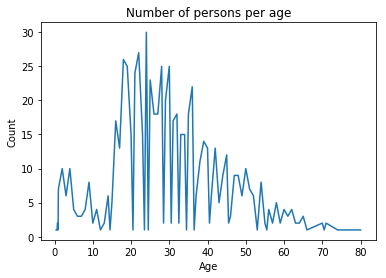

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use the binary classifier on all data.
Xs = age_2_count.loc[:,'Age']
Ys = age_2_count.loc[:,'Count']
plt.plot(Xs, Ys)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of persons per age')
plt.show()

# Preparing Training Data Set

In [11]:
df_tmp = pd.get_dummies(df_raw, columns=['Pclass','Sex'])

df_tmp.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
def create_X(df_raw, use_one_hot=False):
    features_clf = 'Pclass,Sex,Fare'.split(',')
    X = df_raw.loc[:, features_clf]

    if use_one_hot:
        # Features to one-hot encode.
        features_to_encode = ['Sex', 'Pclass']
        
        # Use one-hot encoding for categorical data.
        X = pd.get_dummies(X, columns=features_to_encode)
    else:
        # Add Sex as number.
        sex_to_number = lambda x: 1 if x == 'male' else 0
        X['Sex'] = df_raw.loc[:, 'Sex'].apply(sex_to_number)

    return X
        
# Prepare the data sets.
X = create_X(df_raw, use_one_hot=True)
Y = df_raw.loc[:, 'Survived']
X.iloc[:10,:]

,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,7.2500,0,1,0,0,1
1,71.2833,1,0,1,0,0
2,7.9250,1,0,0,0,1
3,53.1000,1,0,1,0,0
4,8.0500,0,1,0,0,1
5,8.4583,0,1,0,0,1
6,51.8625,0,1,1,0,0
7,21.0750,0,1,0,0,1
8,11.1333,1,0,0,0,1
9,30.0708,1,0,0,1,0


# 5-fold Cross Validation

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import clone

def print_features_importance(df, clf):
    # Display the features by descending importance.
    df_disp = pd.DataFrame(list(zip(list(df.columns), clf.feature_importances_)))
    df_disp.columns = ['Feature', 'Percentage']
    print(df_disp.sort_values(by='Percentage', ascending=False).to_string(index=False))

def cross_val_score_do(name, clf, X, Y, cv):
    # Cross validate the classifier.
    scores = cross_val_score(clf, X, Y, cv=cv)
    print("\n%s Score: %.10f" % (name, scores.mean()))
    
    # Fit the classifier and show the feature importance.
    clf_cloned = clone(clf)
    clf_cloned.fit(X, Y)
    
    # Display the features by descending importance.
    print_features_importance(X, clf_cloned)

/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=0)
cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)


RandomForestClassifier Score: 0.8003240670
Feature  Percentage
      Fare    0.521398
  Sex_male    0.256561
Sex_female    0.106883
  Pclass_3    0.062585
  Pclass_1    0.031181
  Pclass_2    0.021392

ExtraTreesClassifier Score: 0.8148932880
Feature  Percentage
      Fare    0.463753
Sex_female    0.244080
  Sex_male    0.157536
  Pclass_1    0.052029
  Pclass_3    0.048355
  Pclass_2    0.034248

DecisionTreeClassifier Score: 0.8126776242
Feature  Percentage
      Fare    0.464176
Sex_female    0.411239
  Pclass_3    0.114666
  Pclass_1    0.007290
  Pclass_2    0.002629
  Sex_male    0.000000

GradientBoostingClassifier Score: 0.7743929240
Feature  Percentage
      Fare    0.771429
  Pclass_3    0.100000
  Sex_male    0.085714
  Pclass_1    0.042857
Sex_female    0.000000
  Pclass_2    0.000000


# 5-fold Cross Validation with GridSearch

In [15]:
from sklearn.model_selection import GridSearchCV

def do_cross_validation(clf, X, Y, k):
    """
    Run the k-fold GridSearchCV on X and Y
    
    Parameters
    ----------
    clf: the original classifier to clone for testing the hyperparameters.
    X: the data set to use for splitting into training and cross validation datasets.
    Y: the labels.
    k; the number of cross validation datasets split from X.
    
    Returns
    -------
    clf: the best classifier after evaluating all the possible hyperparameter settings.
    
    """
    parameters = {'max_features': [1, len(X.columns)], 'n_estimators': [5, 50, 250, 400]}

    clf_cv = GridSearchCV(clf, parameters, cv=k)

    %timeit
    clf_model = clf_cv.fit(X, Y)

    # Display the scores.
    for row in clf_model.grid_scores_:
        print(row)

    return clf_model.best_estimator_

clf = do_cross_validation(clf_etc, X, Y, 5)

mean: 0.81145, std: 0.03552, params: {'max_features': 1, 'n_estimators': 5}
mean: 0.80920, std: 0.03165, params: {'max_features': 1, 'n_estimators': 50}
mean: 0.81033, std: 0.03096, params: {'max_features': 1, 'n_estimators': 250}
mean: 0.80920, std: 0.03391, params: {'max_features': 1, 'n_estimators': 400}
mean: 0.81033, std: 0.02855, params: {'max_features': 6, 'n_estimators': 5}
mean: 0.81257, std: 0.03082, params: {'max_features': 6, 'n_estimators': 50}
mean: 0.81257, std: 0.02958, params: {'max_features': 6, 'n_estimators': 250}
mean: 0.81145, std: 0.03140, params: {'max_features': 6, 'n_estimators': 400}


/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# Evaluation of the Classifier

In [16]:
from sklearn.metrics import confusion_matrix

# Print features importance.
print_features_importance(X, clf)

Feature  Percentage
      Fare    0.447013
Sex_female    0.222069
  Sex_male    0.189170
  Pclass_3    0.105492
  Pclass_1    0.033409
  Pclass_2    0.002846


In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def display_metrics(clf, X, Y):
    # Predict the values on X.    
    X_prediction = clf.predict(X)

    print("Score: %.15f" % clf.score(X, Y))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, X_prediction)
    # tn, fp, fn, tp = cnf_matrix.ravel()

    # Compute confusion matrix
    np.set_printoptions(precision=2)

    class_names = ['Did Not', 'Survived']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Score: 0.904601571268238
Confusion matrix, without normalization
[[529  20]
 [ 65 277]]
Normalized confusion matrix
[[0.96 0.04]
 [0.19 0.81]]


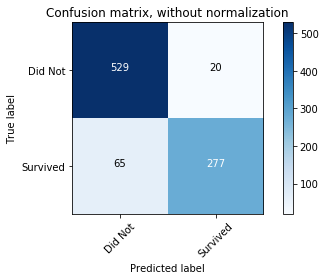

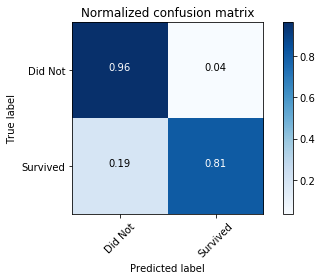

In [18]:
display_metrics(clf, X, Y)

# Imputation of Missing Values

In [19]:
print("Missing values per column:")
print(df_raw.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(df_raw.query('Embarked != Embarked').loc[:, ['PassengerId', 'Embarked']])
print('\n' + str(df_raw.isnull().any()))

     PassengerId Embarked
61            62      NaN
829          830      NaN

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [21]:
# Show the most frequent value in the features.
df_raw['Age'].mode().values[0]

24.0

In [22]:
from sklearn.preprocessing import Imputer

def impute(df, df_for_fit=None, strategy='mean', column='Age'):
    """
    Impute the data frame using a strategy on a column.
    
    Parameters
    ----------
    df: DataFrame.
    df_for_fit: None or the data frame to fit. If None then the df is fitted.
    strategy: a string for the strategy name defined from sklearn.preprocessing.Imputer.
    column: a string for the name of the column to apply the imputation.
    
    Returns
    -------
    data frame : DataFrame with a new column called 'column'_imputed instead of the 'column'.
    
    """
    
    # print(df_raw_2.dtypes)
    imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)

    reshape_df = lambda df: np.reshape(df[column].values, (1, df[column].shape[0]))
    ss = reshape_df(df)
    model_imp2 = imp.fit(ss)

    # Transform the df.
    df_to_fit = ss if df_for_fit is None else reshape_df(df_for_fit)
    res = model_imp2.transform(df_to_fit)

    df_tmp = df.copy()
    new_column = column + '_imputed'
    df_tmp[new_column] = res[0]
    
    df_tmp = df_tmp.drop(column, axis=1)
    print(df_tmp.columns)
    
    return df_tmp

In [23]:
# Proceed to impute the Age column.
X_aug = pd.concat([X, df_raw.loc[:, 'Age']], axis=1)

print(df_raw.query('Age != Age').loc[:20, ['PassengerId','Age']])
X_imp = impute(X_aug, X_aug, column='Age')

print(X_aug.shape, X_imp.shape)

    PassengerId  Age
5             6  NaN
17           18  NaN
19           20  NaN
Index(['Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Age_imputed'],
      dtype='object')
(891, 7) (891, 7)


In [24]:
# Show the result.
print("Missing values per column:")
print(X_imp.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
Fare           0
Sex_female     0
Sex_male       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Age_imputed    0
dtype: int64


In [25]:
# Run the CV.
clf_impured_1 = do_cross_validation(clf_etc, X_imp, Y, 5)

mean: 0.79686, std: 0.01994, params: {'max_features': 1, 'n_estimators': 5}
mean: 0.80022, std: 0.01955, params: {'max_features': 1, 'n_estimators': 50}
mean: 0.79125, std: 0.03007, params: {'max_features': 1, 'n_estimators': 250}
mean: 0.79349, std: 0.02569, params: {'max_features': 1, 'n_estimators': 400}
mean: 0.79574, std: 0.03694, params: {'max_features': 7, 'n_estimators': 5}
mean: 0.79574, std: 0.02587, params: {'max_features': 7, 'n_estimators': 50}
mean: 0.80022, std: 0.03067, params: {'max_features': 7, 'n_estimators': 250}
mean: 0.79574, std: 0.02609, params: {'max_features': 7, 'n_estimators': 400}


/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [26]:
# Score
print("Score: %.15f" % clf_impured_1.score(X_imp, Y))

# Print features importance.
print_features_importance(X_imp, clf_impured_1)

Score: 0.979797979797980
Feature  Percentage
       Fare    0.310739
Age_imputed    0.276089
 Sex_female    0.151386
   Sex_male    0.151105
   Pclass_1    0.055618
   Pclass_3    0.038283
   Pclass_2    0.016780


Score: 0.979797979797980
Confusion matrix, without normalization
[[546   3]
 [ 15 327]]
Normalized confusion matrix
[[0.99 0.01]
 [0.04 0.96]]


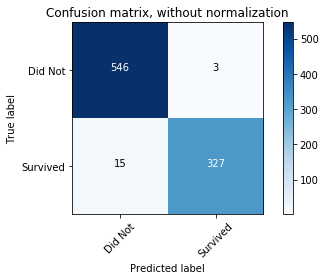

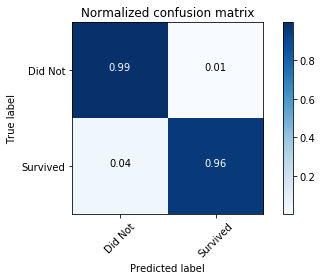

In [27]:
# Display metrics.
display_metrics(clf_impured_1, X_imp, Y)

# CSV of Test Data Set Prediction

In [28]:
print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

print(df_test_raw.iloc[:20,])
df_test_raw.query('Fare != Fare')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
from sklearn.preprocessing import Imputer

X_test = create_X(df_test_raw, use_one_hot=True)
# print(X_test)

X_test_aug = pd.concat([X_test, df_raw.loc[:, 'Age']], axis=1)

X_test_imp = impute(X_aug, X_test_aug, column='Age')

X_test_predicted = clf_impured_1.predict(X_test_imp)

print(X_test.iloc[:10,])

Index(['Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Age_imputed'],
      dtype='object')
      Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0   7.8292           0         1         0         0         1
1   7.0000           1         0         0         0         1
2   9.6875           0         1         0         1         0
3   8.6625           0         1         0         0         1
4  12.2875           1         0         0         0         1
5   9.2250           0         1         0         0         1
6   7.6292           1         0         0         0         1
7  29.0000           0         1         0         1         0
8   7.2292           1         0         0         0         1
9  24.1500           0         1         0         0         1


In [31]:
import datetime

df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

today = datetime.datetime.today()
today_s = today.strftime('%Y%M%d-%H%M')

csv_dest = "%s/csv_submission_%s.csv" % (base_path_data, today_s)

# Save the CSV
df_to_submit.to_csv(csv_dest, index=False)

print("test prediction save in:\n %s" % csv_dest)

test prediction save in:
 ../../data/csv_submission_20182431-1424.csv
